## <center> Text Mining for Social Sciences <center>
<center> Exercise 1<center>
<center> April, 2019<center>
<center> Maia Brenner <center>

I will create different functions with **re** in order to clean and lemmatized a dataset with tweets. Then I visualize a vocabulary embedding via TSNE with different pre-processed data to observe how documents can differently separate in space.

In [118]:
#I import libraries needed
import pandas as pd
pd.set_option('max_colwidth', 80)
from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns

In [48]:
#Import dataset
data = pd.read_csv('data/tweets.csv')
data.head(5)

,tweet,label
0,RT @LilMissRightie: Here's CNN on Sharia law. You can be stoned or have your...,y2016
1,RT @NetworksManager: LOOK obama Clinton cronies ILLEGALLY arm &amp; train mu...,y2016
2,RT @GrrrGraphics: #ThrowbackThursday #BenGarrison #cartoon from 2013 #Obama ...,y2016
3,"RT @PeterTownsend7: Say 'Islam is peace', or else! #trump #maga #isis #tcot...",y2016
4,RT @ToddDracula: @realDonaldTrump All aboard the Trump Train! #ChooChoo 🚂 ht...,y2016


In [5]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

## I create two different functions:

### 1) Function to clean the tweet

In [131]:
#I create a function that cleans each individual tweet
def cleaner_twitter(X):

    #I start by taking out the mention to users with @XXXX
    no_mentions = re.sub(r'@[A-Za-z0-9]+','', X)

    #I take out the url links
    no_url = re.sub('https?://[A-Za-z0-9./]+','',no_mentions)
    

    #I take the # from the hashtags and any other symbol that is not a letter including emojis
    no_symbols = re.sub("[^a-zA-Z]", " ", no_url)
    

    #I lower case everything

    lower_case = no_symbols.lower()
    
    # I delete the rt and https words
    cleaned_data = re.sub('rt', '', lower_case)
    
    cleaned_data = re.sub('https', '', cleaned_data)


    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 

    return cleaned_data

In [138]:
#I apply my clean_twitter to my twitter data

data_to_clean = data.tweet[:data.shape[0]]
cleaned_tweets = []

for t in data_to_clean:
    cleaned_tweets.append(cleaner_twitter(t))

#I recreate the dataframe with the cleaned data    
clean_df = pd.DataFrame(cleaned_tweets,columns=['cleaned_tweet'])
clean_df['label'] = data.label
clean_df.head()

,cleaned_tweet,label
0,here s cnn on sharia law you can be stoned or have your hands cut off b...,y2016
1,look obama clinton cronies illegally arm amp train muslims terrorist in...,y2016
2,throwbackthursday bengarrison caoon from obama gets crowned war...,y2016
3,say islam is peace or else trump maga isis tcot,y2016
4,all aboard the trump train choochoo,y2016


### 2) Function that lemmatized the cleaned tweet

In [133]:
def lemmatizer_twitter(X):
    
    cleaned_data = clean_twitter(X)
    
     # Parse the sentence using the loaded 'en' model object `nlp`
    parsed = nlp(cleaned_data)

    # Extract the lemma for each token and join
    lemmatized= " ".join([token.lemma_ for token in parsed])
    
    return lemmatized


In [146]:
#I apply my lemmatizer_twitter to my twitter data

data_to_lemmatize = data.tweet[:data.shape[0]]
lem_tweets = []

for t in data_to_lemmatize:
    lem_tweets.append(lemmatizer_twitter(t))

#I recreate the dataframe with the lemmatized data    
lem_df = pd.DataFrame(lem_tweets,columns=['lemmatized_tweet'])
lem_df['label'] = data.label
lem_df.head()

,lemmatized_tweet,label
0,here s cnn on sharia law -PRON- can be stone or have -PRON- hand cut o...,y2016
1,look obama clinton crony illegally arm amp train muslim terrorist in...,y2016
2,throwbackthursday bengarrison caoon from obama get crown w...,y2016
3,say islam be peace or else trump maga isis tcot,y2016
4,all aboard the trump train choochoo,y2016


In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
#I used a function given to visualizes a vocabulary embedding via TSNE
def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d

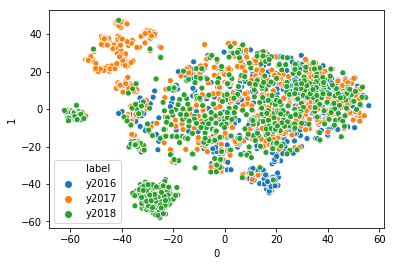

In [141]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

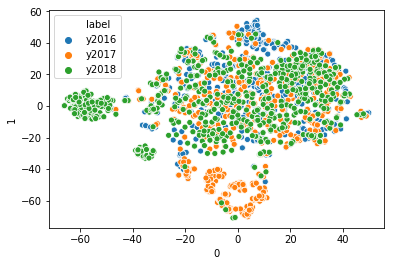

In [142]:
# Now let's see what our cleaning has done
X = clean_df.cleaned_tweet
vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

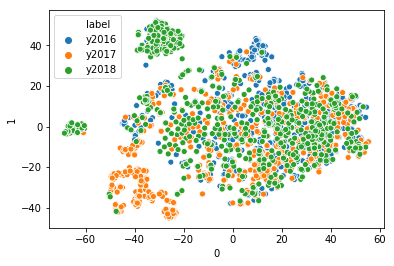

In [143]:
# Now let's see what our cleaner and lemmatizer has done
X = lem_df.lemmatized_tweet
vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

### Now I try adding explicit stopwords 

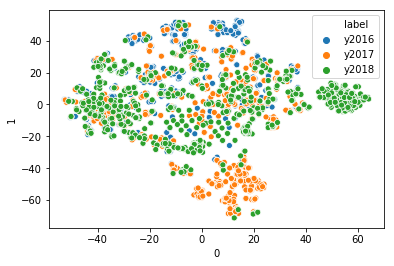

In [144]:
# Can you get things to separate in the space in a better way? 
X = lem_df.lemmatized_tweet
vectorizer = CountVectorizer(stop_words='english')
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

### Now I try with ngram_range=(2,2) to see whether things get more separated in space

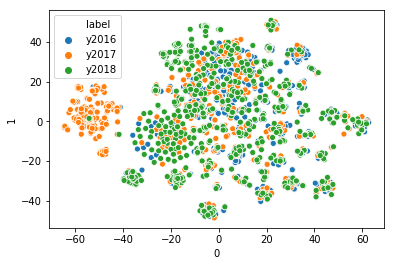

In [150]:
# Can you get things to separate in the space in a better way? 
X = lem_df.lemmatized_tweet
vectorizer = CountVectorizer(ngram_range=(2,2))
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

With ngram_range=(2,2) and our cleaned and lemmatized data we observe that the documents get separated in more subgroups that could be of interest to further analyze